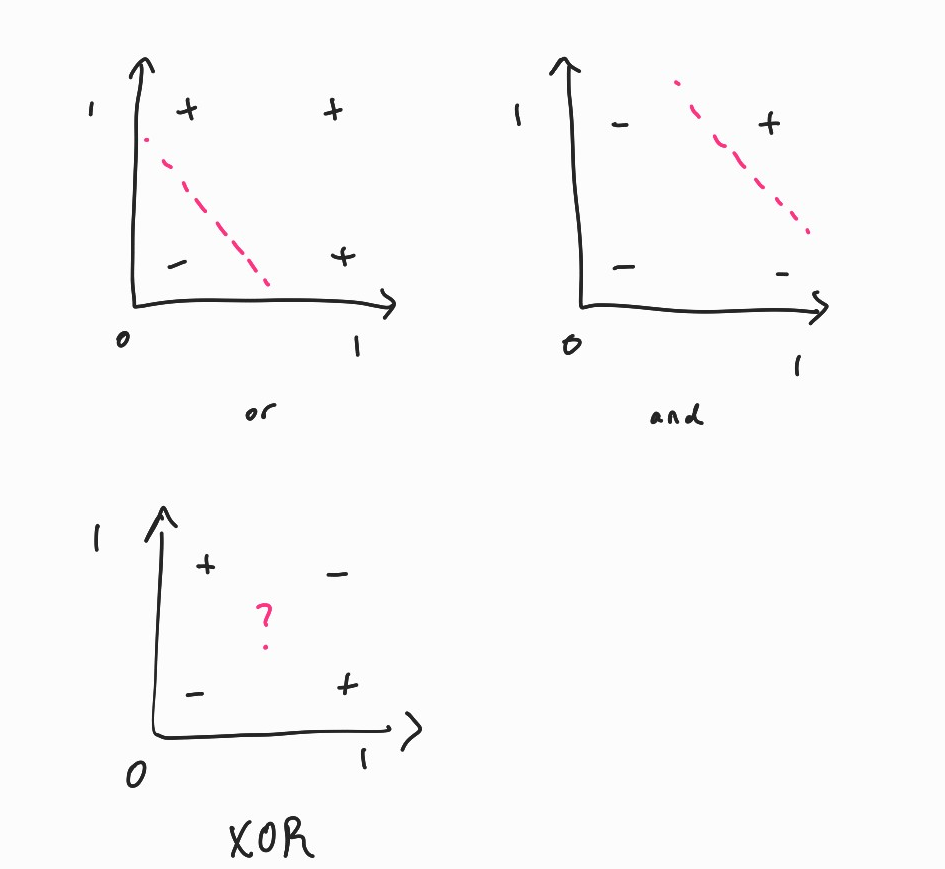

In [1]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777) 

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\appdata\

Instructions for updating:
Colocations handled automatically by placer.


레이어를 두개로 나누어 계산  
W와 b를 각각 하나씩만 설정해 계산할 경우 accuracy가 0.5가 됨.

In [2]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

cross entropy

In [3]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.75844026
200 0.69405544
400 0.6908216
600 0.68683594
800 0.68083966
1000 0.67128885
1200 0.6563796
1400 0.6348422
1600 0.6069378
1800 0.5737409
2000 0.5341575
2200 0.48264137
2400 0.4131409
2600 0.33173415
2800 0.25639716
3000 0.19811329
3200 0.15639666
3400 0.1268526
3600 0.105539404
3800 0.08974177
4000 0.0777061
4200 0.06830374
4400 0.06079525
4600 0.05468358
4800 0.049625997
5000 0.045380343
5200 0.041771427
5400 0.03866999
5600 0.035978787
5800 0.03362347
6000 0.03154632
6200 0.029701883
6400 0.028053997
6600 0.026573364
6800 0.025236338
7000 0.024023317
7200 0.022918165
7400 0.021907363
7600 0.020979445
7800 0.020124841
8000 0.019335382
8200 0.018603895
8400 0.017924387
8600 0.017291585
8800 0.016700877
9000 0.016148226
9200 0.015630178
9400 0.015143627
9600 0.014685803
9800 0.014254246
10000 0.013846756

Hypothesis:
[[0.01338217]
 [0.98166394]
 [0.98809415]
 [0.01135801]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0
